# Taylor Swift | The Eras Tour Official Setlist Data

https://www.kaggle.com/datasets/yukawithdata/taylor-swift-the-eras-tour-official-setlist-data/data


**Attribute Descriptions**:
* **artist_name**: the name of the artist (Taylor Swift)
* **track_name**: the title of the track
* **is_explicit**: Indicates whether the track contains explicit content
* **album_release_date**: The date when the track was released
* **genres**: A list of genres associated with Beyoncé
<br></br>

* **danceability**: A measure from 0.0 to 1.0 indicating how suitable a track is for - dancing based on a combination of musical elements
* **valence**: A measure from 0.0 to 1.0 indicating the musical positiveness conveyed by a track
* **energy**: A measure from 0.0 to 1.0 representing a perceptual measure of intensity and activity
* **loudness**: The overall loudness of a track in decibels (dB)
* **acousticness**: A measure from 0.0 to 1.0 whether the track is acoustic
<br></br>

* **instrumentalness**: Predicts whether a track contains no vocals
* **liveness**: Detects the presence of an audience in the recordings 
* **speechiness**: Detects the presence of spoken words in a track
<br></br>

* **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation
* **tempo**: The overall estimated tempo of a track in beats per minute (BPM)
* **mode**: Modality of the track
* **duration_ms**: The length of the track in milliseconds
* **time_signature**: An estimated overall time signature of a track

**Predict Feature**: 
* **popularity**: A score between 0 and 100, with 100 being the most popular

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Prepare dataset

Data source & data cleaning:   
Missing values, duplicates, outliers, aggreagate features, normalization, encoding, formatting issues, inconsistant data, etc.

In [97]:
df = pd.read_csv(r'data/era_tour_setlist.csv').drop_duplicates().set_index('track_name')

# Formatting issues
df['album_release_date'] = pd.to_datetime(df['album_release_date'], format='%Y-%m-%d')

# Redudent feature
df = df.loc[:, df.nunique() > 1]

# Encoding
df['is_explicit'] = df['is_explicit'].astype(int)

df.head()

,is_explicit,album_release_date,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature,popularity
track_name,,,,,,,,,,,,,,,,
Miss Americana & The Heartbreak Prince,0,2019-08-23,0.662,0.487,0.747,-6.926,0.02800,0.006150,0.1380,0.0736,11,150.088,0,234147,4,79
Cruel Summer,0,2019-08-23,0.552,0.564,0.702,-5.707,0.11700,0.000021,0.1050,0.1570,9,169.994,1,178427,4,94
The Man,0,2019-08-23,0.777,0.633,0.658,-5.191,0.07670,0.000000,0.0901,0.0540,0,110.048,1,190360,4,82
You Need To Calm Down,0,2019-08-23,0.771,0.714,0.671,-5.617,0.00929,0.000000,0.0637,0.0553,2,85.026,1,171360,4,81
Lover,0,2019-08-23,0.359,0.453,0.543,-7.582,0.49200,0.000016,0.1180,0.0919,7,68.534,1,221307,4,88


In [98]:
df.shape

(44, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, Miss Americana & The Heartbreak Prince to Karma
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   is_explicit         44 non-null     int64         
 1   album_release_date  44 non-null     datetime64[ns]
 2   danceability        44 non-null     float64       
 3   valence             44 non-null     float64       
 4   energy              44 non-null     float64       
 5   loudness            44 non-null     float64       
 6   acousticness        44 non-null     float64       
 7   instrumentalness    44 non-null     float64       
 8   liveness            44 non-null     float64       
 9   speechiness         44 non-null     float64       
 10  key                 44 non-null     int64         
 11  tempo               44 non-null     float64       
 12  mode                44 non-null     int64         
 13  duration_ms      

### Overview and Summary

In [3]:
df_num = df.select_dtypes(include=['float', 'int'])
df_num.describe().T\
    .join(pd.DataFrame(df_num.skew(), columns=['skew']))\
    .join(pd.DataFrame(df_num.kurtosis(), columns=['kurtosis']))\
    .join(pd.DataFrame(df_num.nunique(), columns=['unique number']))\
    .join(pd.DataFrame(df_num.std()/df_num.mean(), columns=['Coefficient of Variance']))

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,unique number,Coefficient of Variance
is_explicit,44.0,0.227273,0.423915,0.000000,0.000000,0.000000,0.000000,1.0000,1.347979,-0.193892,2,1.865226
danceability,44.0,0.599477,0.110550,0.359000,0.534250,0.609500,0.646500,0.8720,-0.051732,0.270381,42,0.184411
valence,44.0,0.395736,0.202988,0.049900,0.225250,0.416000,0.511750,0.9030,0.372844,-0.428446,43,0.512938
energy,44.0,0.576909,0.172917,0.240000,0.408500,0.600000,0.713000,0.8660,-0.386620,-0.993673,44,0.299731
loudness,44.0,-7.895841,2.509138,-14.132000,-10.236500,-7.510500,-5.707000,-3.5460,-0.358812,-0.680257,43,-0.317780
acousticness,44.0,0.280691,0.293417,0.000443,0.036375,0.126500,0.524250,0.9200,0.894185,-0.554949,44,1.045340
instrumentalness,44.0,0.000798,0.003592,0.000000,0.000000,0.000003,0.000062,0.0232,5.979696,37.347872,27,4.502304
liveness,44.0,0.137098,0.085399,0.057600,0.090850,0.106000,0.146250,0.4750,2.342496,5.800986,41,0.622910
speechiness,44.0,0.075068,0.063762,0.025300,0.034500,0.056700,0.081100,0.3870,3.069187,12.692495,44,0.849385
key,44.0,5.272727,3.636786,0.000000,2.000000,6.500000,8.000000,11.0000,-0.245256,-1.182387,10,0.689735


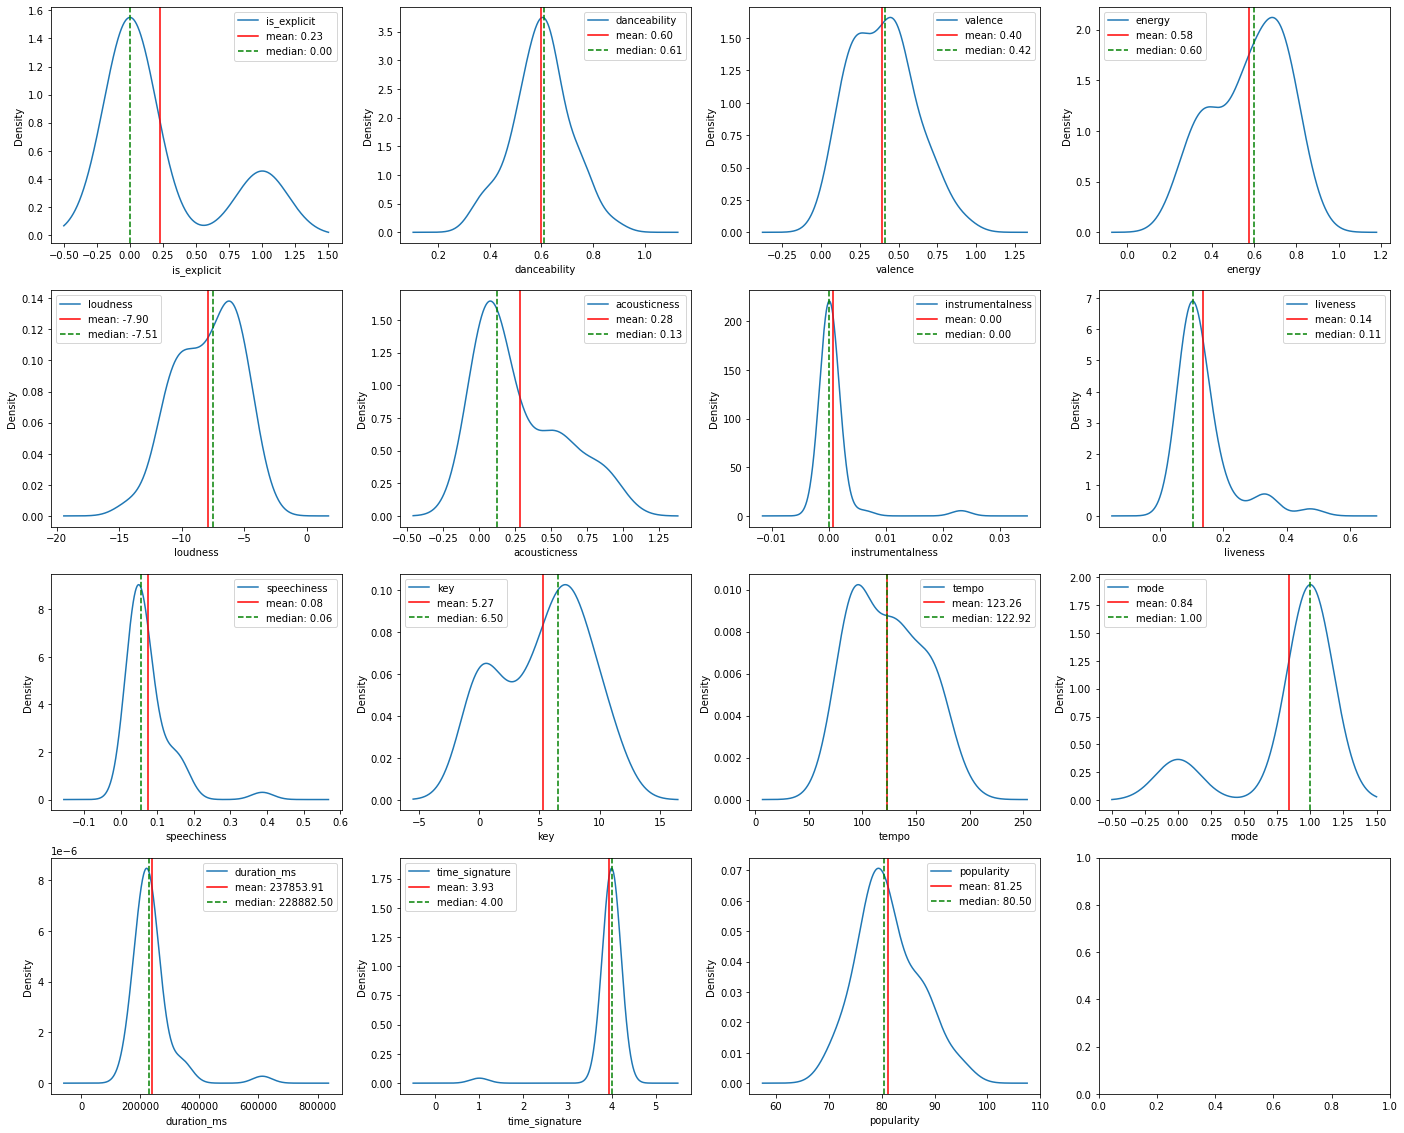

In [4]:
features = list(df_num.columns)
n = int(np.ceil(np.sqrt(len(features))))
fig, ax = plt.subplots(n, n, figsize=(24, 20))

for i in range(len(features)):
    mean = df[features[i]].mean()
    median = df[features[i]].median()
    cv = df[features[i]].std()/df[features[i]].mean()

    df[[features[i]]].plot(kind='density', ax=ax[i//n][i%n], label='_nolegend_')
    ax[i//n][i%n].axvline(mean, linestyle='-', color='r', label=f'mean: {mean:.2f}')
    ax[i//n][i%n].axvline(median, linestyle='--', color='g', label=f'median: {median:.2f}')

    ax[i//n][i%n].set_xlabel(features[i])
    ax[i//n][i%n].legend()

plt.show()

Most features has a low skewness and kurtosis. Those distrubution is relatively even and the curve is moderate level of concentration and diversity.   
For those features which have absolute skew value more than 1 could indicate a significant skewness. 

* **Instrumentalness**   
  The instrumentalness distribution is extremely concentrated at low values. This indicates that most songs have very low instrumental componnets, emphasizing Taylor's songs are mostly vocal-centric style.

* **Liveness**   
  This distribution is relatively concentrated, noticeabley right-skewed. The kurtosis suggests a more peaked than normal distribution, indicating the most tracks have a little low level of liveness, with a few having higher live performance.

* **Speechiness**   
  Similar to liveness, speechiness and duration_ms concentrated in a low level

* **Popularity**   
  The popurlarity distribution is relatively concentrated, slightly left-skewed. Positive kurtosis suggests a distribution silightly more peaked than normal, indicating a focus on highly popular tracks with a few less popular ones for variety.

Further more, let's get the quantity analysis on linearity and normality of features. Configure the threshold of p-value for normality as 0.05. We'll combine normality and linearity to be as the condition of selecting models. 

### Feature Importance

In [4]:
# Quantity analysis on linearity and normality
from scipy import stats
from scipy.stats import normaltest

X_features = list(df.drop('album_release_date', axis=1).columns)[:-1]
y = df['popularity']

normality_results = {}
linearity_scores = {}

for feature in X_features:
    _, p_value = normaltest(df[feature])
    normality_results[feature] = p_value > 0.05

    _, _, r_value, _, _ = stats.linregress(df[feature], y)
    linearity_scores[feature] = r_value ** 2

overall_normality = np.mean(list(normality_results.values()))
overall_linearity = np.mean(list(linearity_scores.values()))

overall_linearity, overall_normality

(0.018390129615929406, 0.2857142857142857)

As the linearity and normality are both less than 0.3, we treat the features has a stronge non-linear relationship with target variable.

Further let's see for the feature importance relate to popularity, 

In [10]:
# Feature importance
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[X_features])

models = {
    'RandomForest': RandomForestRegressor(n_estimators=10, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=10, random_state=42),
    'MLP': MLPRegressor(hidden_layer_sizes=(10, 10), random_state=42)
}
feature_importance = {}

for model_name, model in models.items():
    model.fit(X_scaled, y)

    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    else:
        #Use SHAP value to get feature importance of MLPRegressor
        r = permutation_importance(model, X_scaled, y, n_repeats=5, random_state=42)
        importance = r.importances_mean

    feature_importance[model_name] = pd.Series(importance, index=X_features)

importance_df = pd.DataFrame(feature_importance)

/Users/xiao/miniforge3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 0, 'Importance')

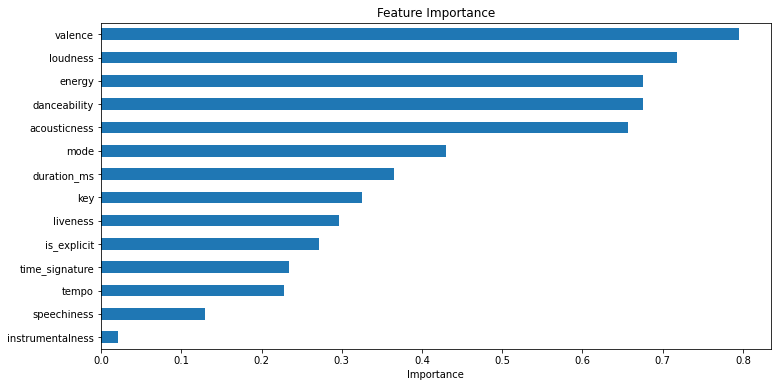

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
importance_df.mean(axis=1).sort_values(ascending=True).plot(kind='barh', ax=ax)
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')

As we have figure out the relationship between X and y are mostly non-linear, we will use Spearman and Kendall to get the correlation with popularity.

Based on th average feature importance among some non-linear models and MLP model, feature importances list shown the order of features, indicating the features as below have a more importance impace on popularity :   
valence, loudness, energy, danceability, acousticness

### Correlation

As the relationship between popularity and other features shown as non-linear, Spearman method is choosen for calculation the correlation amoung features.

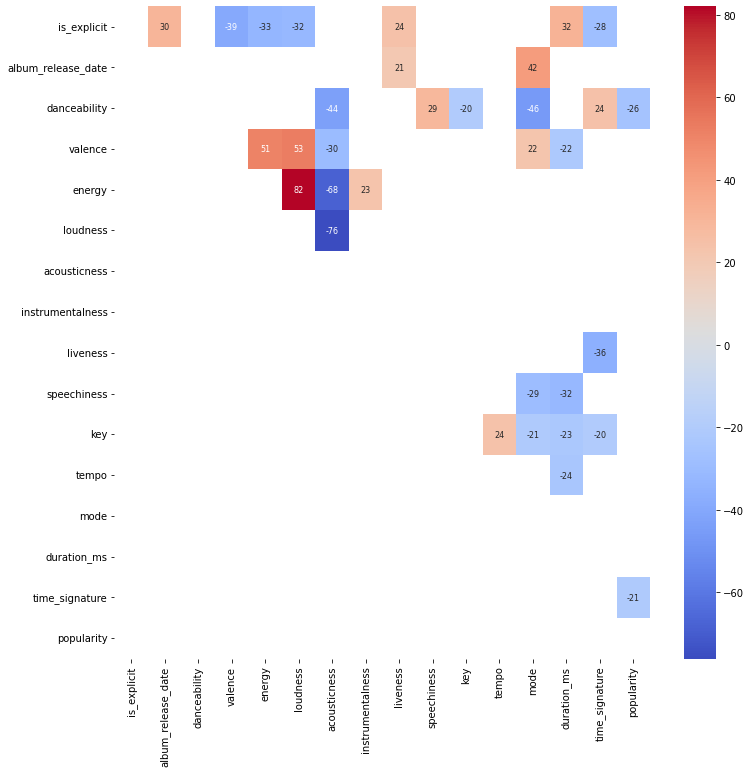

In [23]:
# Correlation
corr_matrix = df.corr('pearson')*100
corr_plot = corr_matrix.where((abs(corr_matrix) > 20) & (np.triu(corr_matrix, 1)))

plt.figure(figsize=(12, 12))
sns.heatmap(corr_plot, annot=True, annot_kws={'size': 8}, cmap='coolwarm')
plt.show()

We can see a very high positive correlation between loudness and energy, and a high negative correlationship between energy and asousticness, loudness and asousticness. When consider to analysis or predict popularity, may need to aggregate to reduce the demension.

### Detailed Analysis

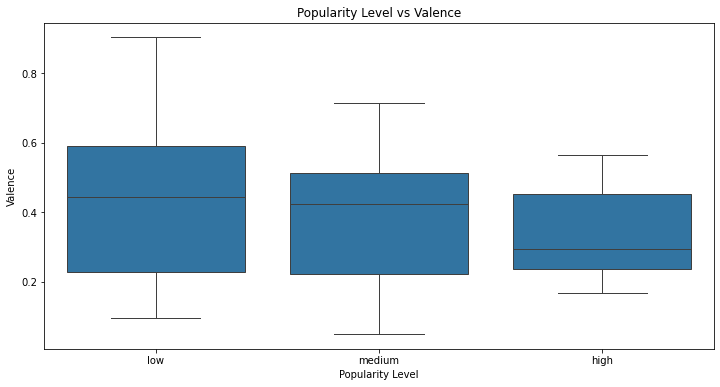

In [88]:
# Popularity level VS. valence
df['popularity_level'] = pd.qcut(df['popularity'], q=3, labels=['low', 'medium', 'high'])

fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='popularity_level', y='valence')
plt.title('Popularity Level vs Valence')
plt.xlabel('Popularity Level')
plt.ylabel('Valence')
plt.show()

Higher popularity songs have a narrow range of valence and a lower median of valance.

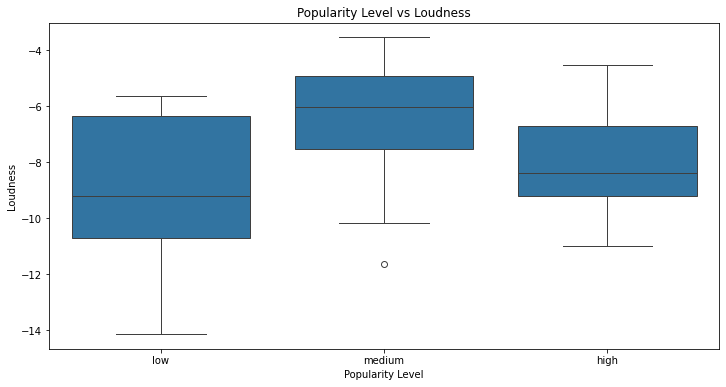

In [85]:
# Popularity level VS. energy

df['popularity_level'] = pd.qcut(df['popularity'], q=3, labels=['low', 'medium', 'high'])

fig = plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='popularity_level', y='loudness')
plt.title('Popularity Level vs Loudness')
plt.xlabel('Popularity Level')
plt.ylabel('Loudness')
plt.show()

Loudness has no significant trends with level of popularity. After observing the relationship between popularity level and the remaining features, similar to this feature, with current number of samples, other features have no significant trends with popularity level.

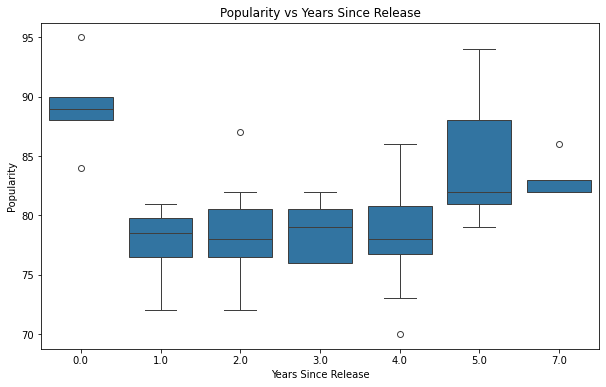

In [77]:
df['years_since_release'] = round((pd.Timestamp.now() - df['album_release_date']).dt.days / 365, 0)
plt.figure(figsize=(10, 6))
sns.boxplot(x='years_since_release', y='popularity', data=df)
plt.title('Popularity vs Years Since Release')
plt.xlabel('Years Since Release')
plt.ylabel('Popularity')
plt.show()

From the temporal trends between Popularity and Release years, we can see:
* the most recent release maintains high popularity.
* after releasing 1-4 years, songs show a wide range of popularity. 
* Some older songs(those released after 5 years) maintains relatively high popularity.

### Conclusion and Further Study

From analysis on these data releave the diversity of musical features in Taylor's Eras Tour setlist and her careful balancing of different musical elements in her compositions. With the current number of samples for analysis, we can see insights from observations and some considerations for further study:
* All these features has very low linearity to popularity, for further analysis or prediction, may need to consider to use non-linear methods.
* Valence, loudness, energy, danceability, acousticness, these features have a more important impact on popularity from non-linear methods. Loudness, energy and acousticness have a high correlation, could use some dimension reduction methods(PCA, Autoencoder, and so on) to reduce the number of features.
* As the number of samples is small, the trendency analysis may not reliable, for further analysis can consider to involve more samples from Taylor's songs and songs from similar singers.